# Business Understanding

## Pucobre
### Copiapó

Sistema de Lixiviación en Pilas
Pilas de Lixiviación

Dos fuentes de datos:
1. Registros de los nodos, tomados por Geo-X.
2. Registros del concentrado de la solución en una zona específica, tomados por el cliente.
* **La data actual corresponde a los datos extraídos por Geo-X**
* Analizar correlación entre las variables medidas por los sensores (registros de Geo-X) y la concentración de mineral luego de la percolación (registros del cliente).

Luego de haberse conectado los nodos en la zona de lixiviación, se efectuó riego por un intervalo de 90 días.

---

### Mediciones
* **Temperatura**: Se genera por la reacción química de la solución con la pila.
* **Humedad**
* **pH**: Se mide para saber si la pila está recibiendo suficiente ácido. A menor pH, mayor reacción.

El cliente necesita:
* Una pila con temperatura alta y humedad controlada (homogénea).
* Evitar zonas secas e inundadas.
    * Mayor humedad puede provocar derrumbes.
* **El cliente necesita que la humedad sea controlada para evitar zonas secas e inundadas. Si la humedad varía demasiado, puede afectar negativamente el rendimiento de la pila y provocar problemas como derrumbes. Por lo tanto, predecir y controlar la humedad podría ser crucial para satisfacer los requisitos del cliente.**
* La humedad en la pila podría estar influenciada por la temperatura y el pH. Por ejemplo, una temperatura alta puede causar evaporación, afectando la humedad, mientras que un pH bajo puede indicar un exceso de ácido, lo que puede influir en las condiciones de humedad.

---

### Dificultades 

#### Desconocimiento y poca comprensión de cómo se comportan variables como temperatura, pH y humedad.
* **Temperatura:** La temperatura dentro de una pila de lixiviación afecta la velocidad de las reacciones químicas involucradas en la extracción de minerales. Sin un monitoreo adecuado, es difícil saber si la temperatura está en el rango óptimo para maximizar la lixiviación
* **pH:** El pH es crucial porque afecta la solubilidad de los minerales y la eficacia del agente lixiviante (como el ácido sulfúrico en el caso del cobre). Si el pH no se controla adecuadamente, puede disminuir la eficiencia del proceso o incluso causar problemas de precipitación de minerales no deseados.
* **Humedad:** La humedad es fundamental para la percolación del agente lixiviante a través de la pila. Un monitoreo insuficiente puede llevar a zonas secas o con exceso de agua, lo que afecta la distribución uniforme del lixiviante y, por lo tanto, la recuperación del mineral.

#### Generación de canales de flujo preferenciales, bolsones y zonas secas, que impiden la percolación del material.
* **Canales de flujo preferenciales:** Estos son caminos en los que el lixiviante fluye más rápidamente, lo que significa que algunas partes de la pila se lixivian más que otras. Esto puede reducir la eficiencia de recuperación de minerales, ya que el lixiviante no entra en contacto con todo el material.
* **Bolsones:** Son áreas en las que se acumula lixiviante sin moverse adecuadamente, lo que puede crear zonas de alta concentración de minerales disueltos, afectando la uniformidad del proceso.
* **Zonas secas:** En estas áreas, el lixiviante no logra llegar, lo que significa que el mineral en estas zonas no se lixivia adecuadamente, disminuyendo la recuperación total del proceso.


---

### Enfoques posibles

#### 1. Optimización del proceso de lixiviación
* **Identificación de patrones:** Se pueden identificar patrones en la distribución de temperatura, humedad y pH que optimizan la eficiencia de la lixiviación.
* **Control en tiempo real:** Los molelos de *Machine Learning* podrían ayudar a ajustar, en tiempo real, los parámetros operativos para mantener condiciones óptimas en la pila, mejorando la recuperación de metales.

#### 2. Detección temprana de problemas
* **Predicción de anomalías:** Modelos predictivos que pudieran detectar desviaciones de las condiciones normales, como la formación de zonas secas, bolsones o canales de flujo preferenciales, antes de que se conviertan en problemas significativos.
* **Mantenimiento predictivo:** El análisis de datos y el ML podrían ayudar a predecir cuándo y dónde es probable que ocurran fallos o problemas en la pila.

#### 3. Optimización del uso de recursos
* **Uso eficiente del lixiviante:** Por medio del análisis de datos, se podrían identificar áreas donde el lixiviante no se está utilizando de manera eficiente, ajustando la aplicación para maximizar la percolación y la extracción.
* **Reducción de costos:** Al optimizar las condiciones de operación y predecir problemas, se pueden reducir los costos asociados al uso de materiales, energía y mano de obra.

#### 4. Personalización del proceso
* **Adaptación a condiciones específicas:** Los modelos de ML se podrían ajustar a las condiciones específicas de una pila de lixiviación, como la composición del mineral o las condiciones climáticas, para mejorar la eficiencia de la lixiviación en cada caso particular.

---

# Data Understanding

---

## Información previa

### Conjuntos de datos
Los archivos CSV originales corresponden a las distintas mediciones tomadas por cada nodo

* Mediciones por nodo:
    * "Humedad 1" (sensor a 1 metro de profundidad)
    * "Humedad 2" (sensor a 1.5 metro de profundidad)
    * "pH"
    * "Temperatura 1" (sensor a 1 metro de profundidad)
    * "Temperatura 2" (sensor a 1.5 metro de profundidad)

---

## Análisis

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
pd.read_csv("../dataset/processed/all_nodes.csv")

,Device,Slot,Epoch,Timestamp,Value,Node
0,A1-GeoNodo 01,Humedad 1,2023-10-24 19:58:57,2023-10-24 16:58:57,0.0,A1
1,A1-GeoNodo 01,Humedad 1,2023-10-24 19:59:56,2023-10-24 16:59:56,0.0,A1
2,A1-GeoNodo 01,Humedad 1,2023-10-24 20:00:56,2023-10-24 17:00:56,0.0,A1
3,A1-GeoNodo 01,Humedad 1,2023-10-24 20:01:56,2023-10-24 17:01:56,0.0,A1
4,A1-GeoNodo 01,Humedad 1,2023-10-24 20:02:27,2023-10-24 17:02:27,0.0,A1
...,...,...,...,...,...,...
2057141,D4-GeoNodo 15,Temperatura 2,2024-01-18 17:01:56,2024-01-18 14:01:56,22.5,D4
2057142,D4-GeoNodo 15,Temperatura 2,2024-01-18 17:02:56,2024-01-18 14:02:56,22.5,D4
2057143,D4-GeoNodo 15,Temperatura 2,2024-01-18 17:03:56,2024-01-18 14:03:56,22.5,D4
2057144,D4-GeoNodo 15,Temperatura 2,2024-01-18 17:06:56,2024-01-18 14:06:56,22.5,D4


In [ ]:
pd.read_csv("../dataset/processed/all_nodes.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057146 entries, 0 to 2057145
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Device     object 
 1   Slot       object 
 2   Epoch      object 
 3   Timestamp  object 
 4   Value      float64
 5   Node       object 
dtypes: float64(1), object(5)
memory usage: 94.2+ MB


---

## Importación del dataset y convertir columnas "Epoch" y "Timestamp" a *datetime*

In [ ]:
df = pd.read_csv("../dataset/processed/all_nodes.csv", 
                 parse_dates=["Epoch", "Timestamp"])

---

## Fechas de registro

### Ámbito general
En UTC 0

In [5]:
print(f"Primer registro de medición: {df['Epoch'].min()}")
print(f"Último registro de medición: {df['Epoch'].max()}")
print(f"Intervalo total de medición: {df['Epoch'].max() - df['Epoch'].min()}")

Primer registro de medición: 2023-10-24 19:56:58
Último registro de medición: 2024-01-18 17:13:18
Intervalo total de medición: 85 days 21:16:20


### Ámbito por nodo

In [6]:
for node in df["Node"].unique():
    print(f"Primer registro de nodo {node}: {df.loc[df['Node'] == node, 'Epoch'].min()}")
    print(f"Último registro de nodo {node}: {df.loc[df['Node'] == node, 'Epoch'].max()}\n")

Primer registro de nodo A1: 2023-10-24 19:58:57
Último registro de nodo A1: 2023-12-14 12:53:48

Primer registro de nodo A2: 2023-10-24 20:01:19
Último registro de nodo A2: 2024-01-10 19:10:41

Primer registro de nodo A3: 2023-10-24 19:56:58
Último registro de nodo A3: 2024-01-18 17:12:21

Primer registro de nodo A4: 2023-10-24 20:01:18
Último registro de nodo A4: 2024-01-18 17:12:55

Primer registro de nodo B1: 2023-10-25 17:51:59
Último registro de nodo B1: 2024-01-18 17:12:49

Primer registro de nodo B2: 2023-10-25 17:45:52
Último registro de nodo B2: 2024-01-18 17:12:06

Primer registro de nodo B3: 2023-10-25 17:50:20
Último registro de nodo B3: 2024-01-10 19:01:22

Primer registro de nodo B4: 2023-10-25 17:47:29
Último registro de nodo B4: 2024-01-18 17:11:48

Primer registro de nodo C1: 2023-10-30 18:38:58
Último registro de nodo C1: 2024-01-18 17:13:10

Primer registro de nodo C2: 2023-10-25 16:56:50
Último registro de nodo C2: 2023-12-14 12:53:48

Primer registro de nodo C3: 20

---

## Pivotar tabla para fusionar filas con un mismo "Epoch" y "Node"

In [7]:
df_pivot = df.pivot_table(index=["Epoch", "Node"], 
                          columns="Slot", 
                          values="Value").sort_values(by=["Node", 
                                                          "Epoch"])

In [8]:
df_pivot = df_pivot.reset_index(level="Node")

In [9]:
df_pivot

Slot,Node,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH
Epoch,,,,,,
2023-10-24 19:58:57,A1,0.0,0.0,50.7,49.3,7.84
2023-10-24 19:59:56,A1,0.0,0.0,50.8,49.4,7.84
2023-10-24 20:00:56,A1,0.0,0.0,50.8,49.4,7.83
2023-10-24 20:01:56,A1,0.0,0.0,50.6,49.4,7.83
2023-10-24 20:02:27,A1,0.0,0.0,50.5,49.4,7.83
...,...,...,...,...,...,...
2024-01-18 17:01:56,D4,24.5,18.8,23.2,22.5,655.35
2024-01-18 17:02:56,D4,24.5,18.8,23.2,22.5,655.35
2024-01-18 17:03:56,D4,24.5,18.8,23.2,22.5,655.35


En esta impresión de las 5 primeras y 5 últimas filas del *DataFrame* podemos notar una serie de valores en las últimas de la columna "pH", con una cifra de 655,35. Si tenemos en cuenta la escala de medición de pH, que mide la acidez o alcalinidad de una solución con un valor entre 0 y 14, estos valores están sobredimensionados.

**Estos valores son arrojados, de manera predeterminada, por los dispositivos que no cuentan con sensores de pH.**

#### Comprobación de información anterior

In [10]:
with_ph_sensor = df_pivot.query("pH > 14")["Node"].unique()
without_ph_sensor = df_pivot.query("pH <= 14")["Node"].unique()

print(f"Nodos con medición de pH por sobre 14: \n{with_ph_sensor}\n")
print(f"Nodos sin medición de pH por sobre 14: \n{without_ph_sensor}\n")

Nodos con medición de pH por sobre 14: 
['A2' 'A3' 'A4' 'B2' 'B4' 'C2' 'C4' 'D2' 'D3' 'D4']

Nodos sin medición de pH por sobre 14: 
['A1' 'B1' 'B3' 'C1' 'C3' 'D1']



In [11]:
# Identificar valores únicos de "pH" por sobre 14
df_pivot.query("pH > 14")["pH"].unique()

array([655.35])

**Según lo anterior, 6 de los 16 dispositivos poseen sensor de pH**

---

## Tratamiento de nulos en tabla pivote

In [12]:
df_pivot.isnull().sum()

Slot
Node                0
Humedad 1         251
Humedad 2        1636
Temperatura 1    1238
Temperatura 2    2294
pH                  0
dtype: int64

Al crear una tabla pivote, se generan valores *NaN* en los registros de intersección de "Epoch" y "Node", en aquellas variables en que no se obtuvieron mediciones ("Humedad 1", "Humedad 2", "Temperatura 1", "Temperatura 2" y/o "pH").

Por lo tanto, la cantidad de valores nulos por columna indica la cantidad de veces en que determinado nodo, en determinado timestamp, no obtuvo medición en la columna o columnas correspondientes.

Por otro lado, que no hayan valores nulos en "pH" no significa que algunos de éstos no merezcan tratamiento, porque corresponden a las de dispositivos que no poseen sensores de pH.

En base a lo anterior, habría que hacer los siguientes tratamientos:
* Se podrían tratar los valores nulos de las columnas con mediciones de humedad y temperatura.
* Reemplazar los valores de 655,35 de la columna "pH" con *NaN*, para que sean más fáciles de manejar en análisis estadísticos y gráficos.

### Tratamiento de valores "pH" de dispositivos sin sensor de pH

Para que los valores de la columna "pH" de los registros que pertenecen a los nodos sin sensor de pH no perjudiquen el análisis estadístico, se procede a reemplazarlo con *NaN*. De esta manera, no se incluirán en los cálculos.

In [13]:
df_pivot["pH"] = df_pivot["pH"].replace(655.35, np.nan)
print(f"Cantidad de valores nulos en columna 'pH': {df_pivot['pH'].isnull().sum()}")

Cantidad de valores nulos en columna 'pH': 310160


---

## Estadísticos principales de cada columna

In [14]:
df_pivot.describe()

Slot,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH
count,412262.000000,410877.000000,411275.000000,410219.000000,102353.000000
mean,30.337388,27.606794,21.981827,22.554946,4.148515
std,8.268669,7.253195,5.100248,5.694048,1.614142
min,0.000000,0.000000,10.400000,10.900000,0.000000
25%,26.400000,23.800000,19.300000,19.400000,2.840000
50%,30.400000,28.500000,20.900000,20.700000,4.040000
75%,34.700000,32.900000,22.900000,22.800000,5.850000
max,51.300000,45.700000,64.400000,49.400000,7.880000


* **count:**
    * "Humedad 1" > "Humedad 2": Diferencia de 1385 registros.
    * "Temperatura 1" > "Temperatura 2": Diferencia de 1056 registros.

* **min:**
    * Mínima de pH de *0*, muy inusual en la mayoría de los contextos.
    * Mínima de Humedad de *0*, lo que es válido.

* **max:**
    * Máxima de 64,4 en Temperatura 1, que difícilmente es válido.
    * Máxima de 49,4 en Temperatura 2, lo que no es común.
    
    **Analizar registros de temperatura, para definir si los valores extremos se obtienen de manera sistemática o no.**
    * Si es algo sistemático, puede ser por problemas con el sensor.
    * Si no, tratarlos como *outliers*. Sugerencia de Geo-X: Filtrar por valores iguales o menores a 45°.

---

## Outliers
Debido a los valores anormales de pH y Temperatura en algunos registros, específicamente en lo que se refiere a los pH=0 y a las máximas elevadas de temperatura, se realizarán algunas operaciones con las columnas correspondientes y se trazarán algunos gráficos. 

### Temperatura
Obtener los registros cuyas mediciones de Temperatura 1 o Temperatura 2 fueron mayor que 46°C

In [15]:
# Filtrar filas
high_temperatures = (
    df_pivot[(df_pivot["Temperatura 1"] >= 46) | 
             (df_pivot["Temperatura 2"] >= 46)]
)

high_temperatures.head()

Slot,Node,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH
Epoch,,,,,,
2023-10-24 19:58:57,A1,0.0,0.0,50.7,49.3,7.84
2023-10-24 19:59:56,A1,0.0,0.0,50.8,49.4,7.84
2023-10-24 20:00:56,A1,0.0,0.0,50.8,49.4,7.83
2023-10-24 20:01:56,A1,0.0,0.0,50.6,49.4,7.83
2023-10-24 20:02:27,A1,0.0,0.0,50.5,49.4,7.83


In [16]:
# Nodos con y sin registro/s de temperatura mayor/es o igual/es a 46°C
high_temperatures_nodes = high_temperatures["Node"].unique()
normal_temperatures_nodes = (
    df_pivot[~df_pivot["Node"]
             .isin(high_temperatures_nodes)]["Node"]
             .unique()
)
print(f"Nodos con registros de T >= 46°C: {high_temperatures_nodes}\n")
print(f"Nodos con registros de T < 46°C: {normal_temperatures_nodes}")

Nodos con registros de T >= 46°C: ['A1' 'A2' 'A4' 'B4' 'C3' 'C4']

Nodos con registros de T < 46°C: ['A3' 'B1' 'B2' 'B3' 'C1' 'C2' 'D1' 'D2' 'D3' 'D4']


A partir de los resultados obtenidos, se puede concluir que los valores de temperatura igual o por sobre 46°C corresponden a mediciones obtenidas en los primeros días luego de iniciado el riego de la solución en la pila de lixiviación.

#### Gráficos de dispersión (Temperatura vs Tiempo)
Por un lado, se considera el factor tiempo para determinar si es que hay algún tipo de evolución y tendencia en la temperatura a lo largo de todo el período de tiempo en que se regaron las pilas.

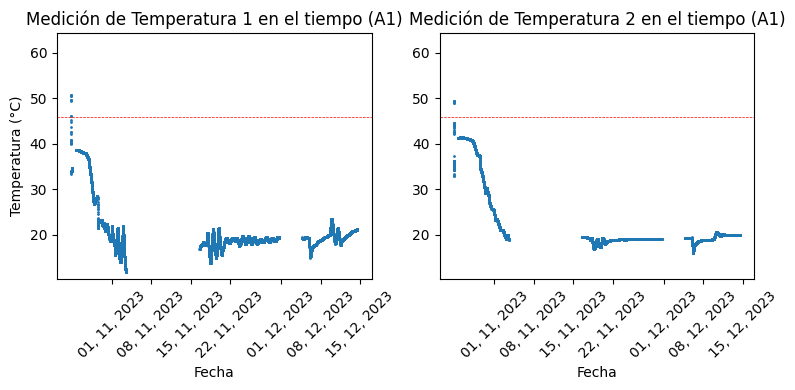

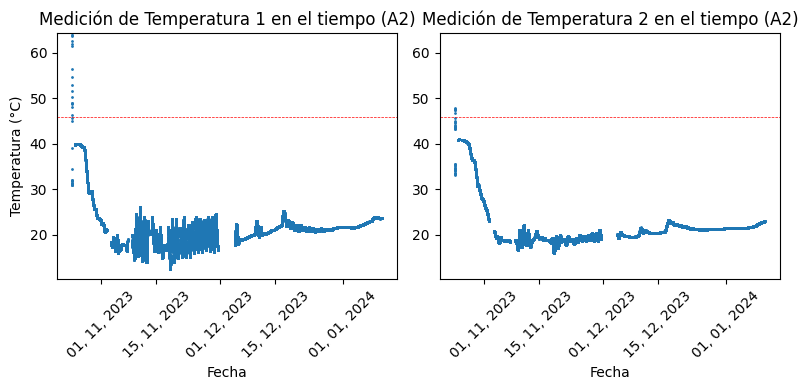

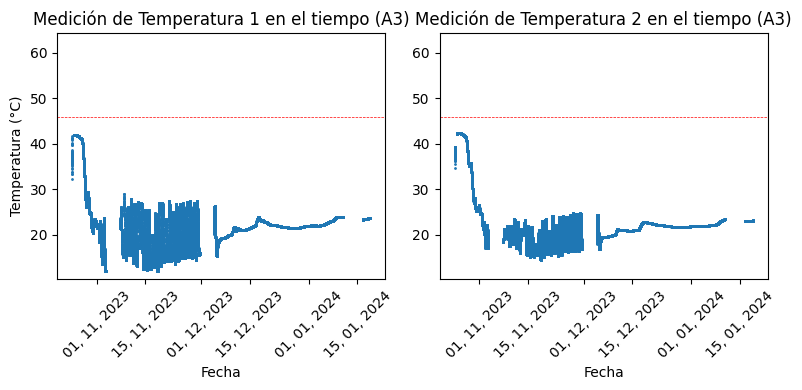

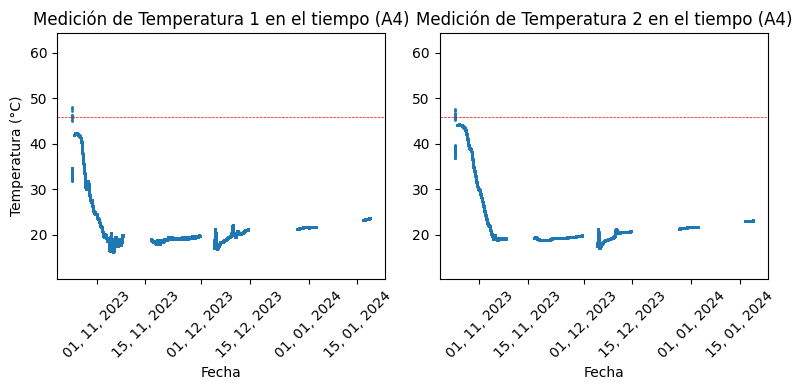

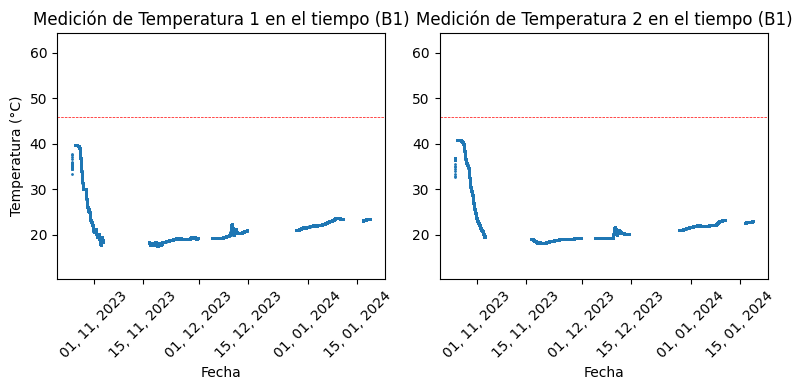

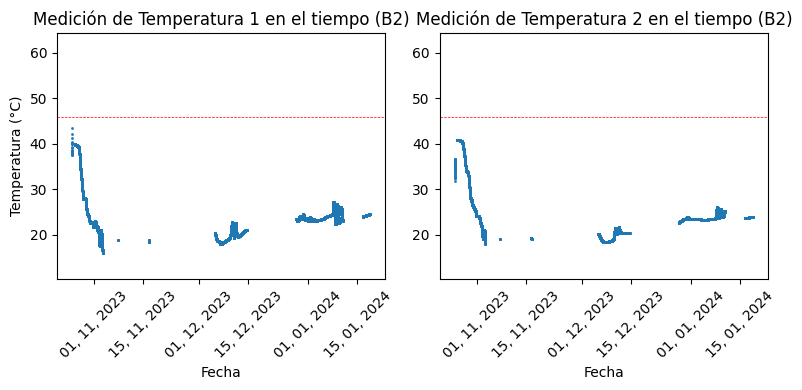

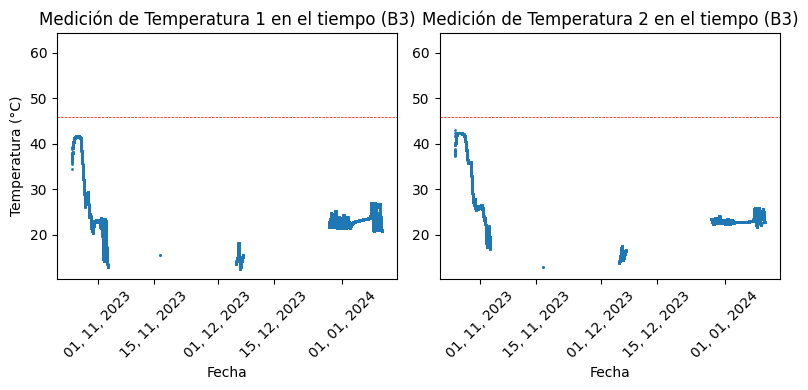

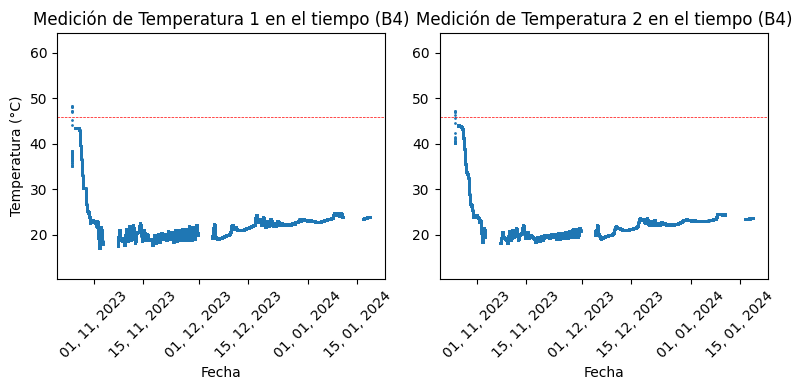

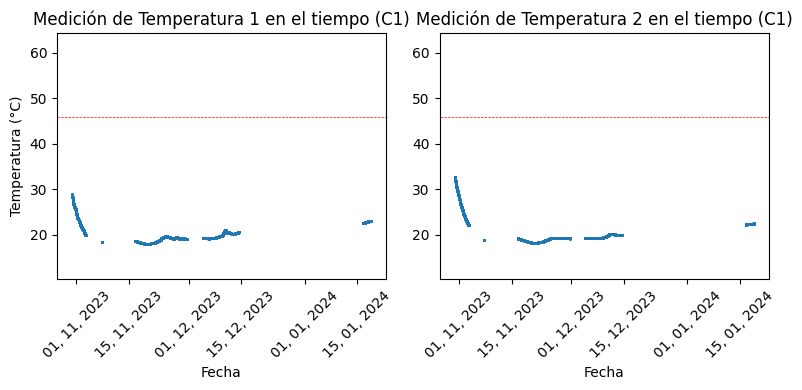

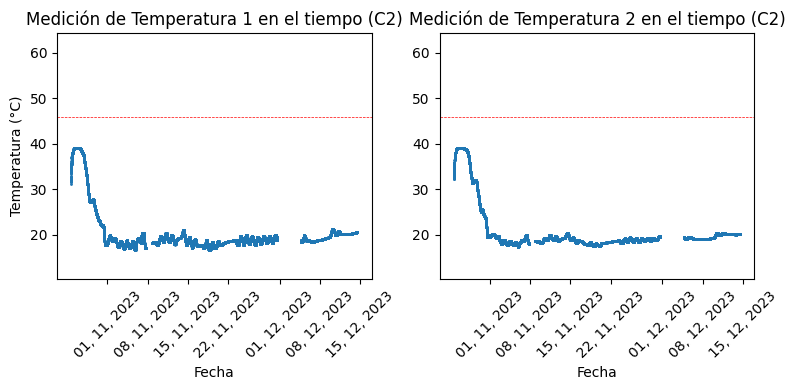

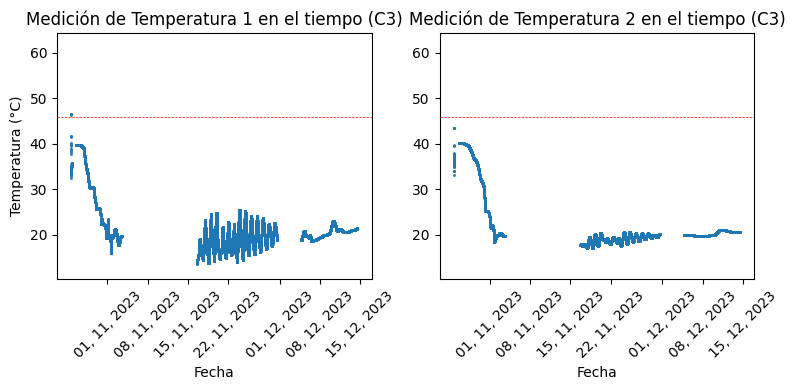

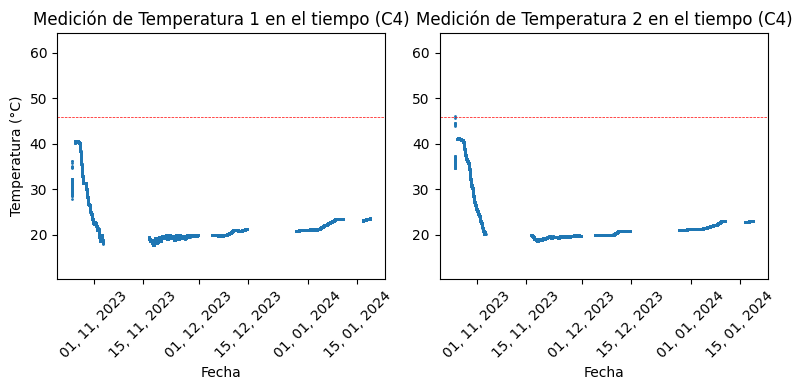

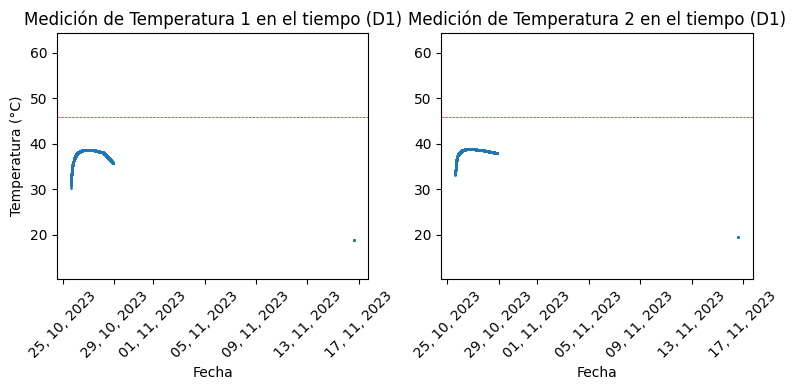

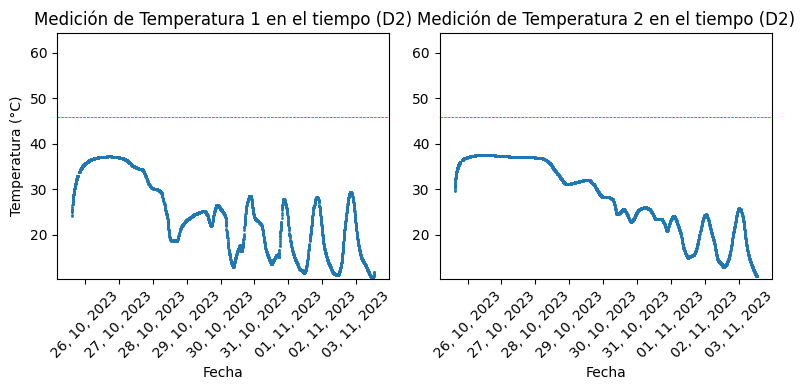

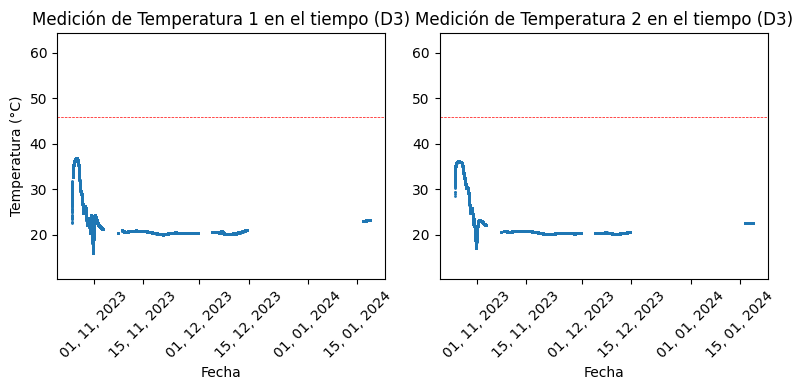

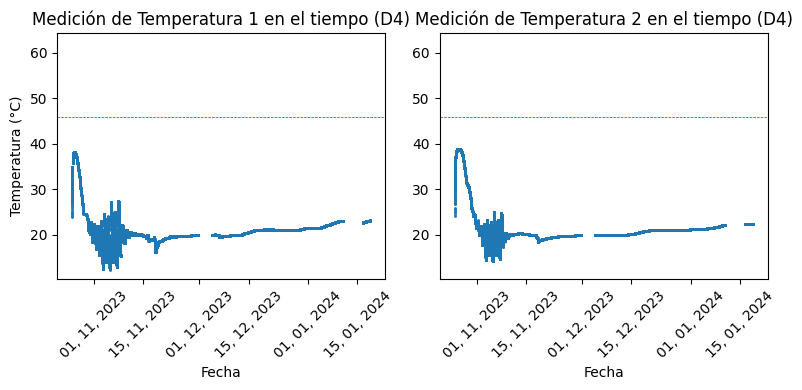

In [17]:
y_min = min(df_pivot["Temperatura 1"].min(), 
            df_pivot["Temperatura 2"].min())
y_max = max(df_pivot["Temperatura 1"].max(), 
            df_pivot["Temperatura 2"].max())

nodes_name = df_pivot["Node"].unique()

figures = []
for node_name in nodes_name:
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   figsize=(8, 4))
    
    df_node = (df_pivot[df_pivot["Node"] == node_name]
               .reset_index()
    )
    
    # Temperatura 1
    ax1.scatter(df_node["Epoch"], 
                df_node["Temperatura 1"], 
                s=1)
    ax1.set_title(f"Medición de Temperatura 1 en el tiempo ({node_name})")
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Temperatura (°C)")
    ax1.xaxis.set_major_formatter(mdates.DateFormatter("%d, %m, %Y"))
    ax1.axhline(y=46, 
                color="red", 
                linestyle="--", 
                linewidth=0.5)
    ax1.tick_params(axis="x", 
                    rotation=45) 
    ax1.set_ylim(y_min, 
                 y_max)
    
    # Temperatura 2
    ax2.scatter(df_node["Epoch"], 
                df_node["Temperatura 2"], s=1)
    ax2.set_title(f"Medición de Temperatura 2 en el tiempo ({node_name})")
    ax2.set_xlabel("Fecha")
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d, %m, %Y"))
    ax2.axhline(y=46, 
                color="red", 
                linestyle="--", 
                linewidth=0.5)
    ax2.tick_params(axis="x", 
                    rotation=45) 
    ax2.set_ylim(y_min, 
                 y_max)
    
    plt.tight_layout()
    figures.append(fig) 

for fig in figures:
    plt.show(fig)

#### Histograma

**Regla de Sturges**
Aplicar regla de Sturges para calcular cantidad óptima de bins para el histograma

In [49]:
columns = ["Humedad 1", "Humedad 2", "Temperatura 1", "Temperatura 2", "pH"]
bins_names = ["h1_bins", "h2_bins", "t1_bins", "t2_bins", "ph_bins"]
bins_values = {}

for col, bin_name in zip(columns, bins_names):
    clean_data = df_pivot[col].dropna() 
    bins_values[bin_name] = int(np.ceil(np.log2(len(clean_data)) + 1)) 

h1_bins = bins_values["h1_bins"]
h2_bins = bins_values["h2_bins"]
t1_bins = bins_values["t1_bins"]
t2_bins = bins_values["t2_bins"]
ph_bins = bins_values["ph_bins"]

for bin_name, bins in bins_values.items():
    print(f"N° bins {bin_name.replace('_bins', '')}:", bins)

N° bins h1: 20
N° bins h2: 20
N° bins t1: 20
N° bins t2: 20
N° bins ph: 18


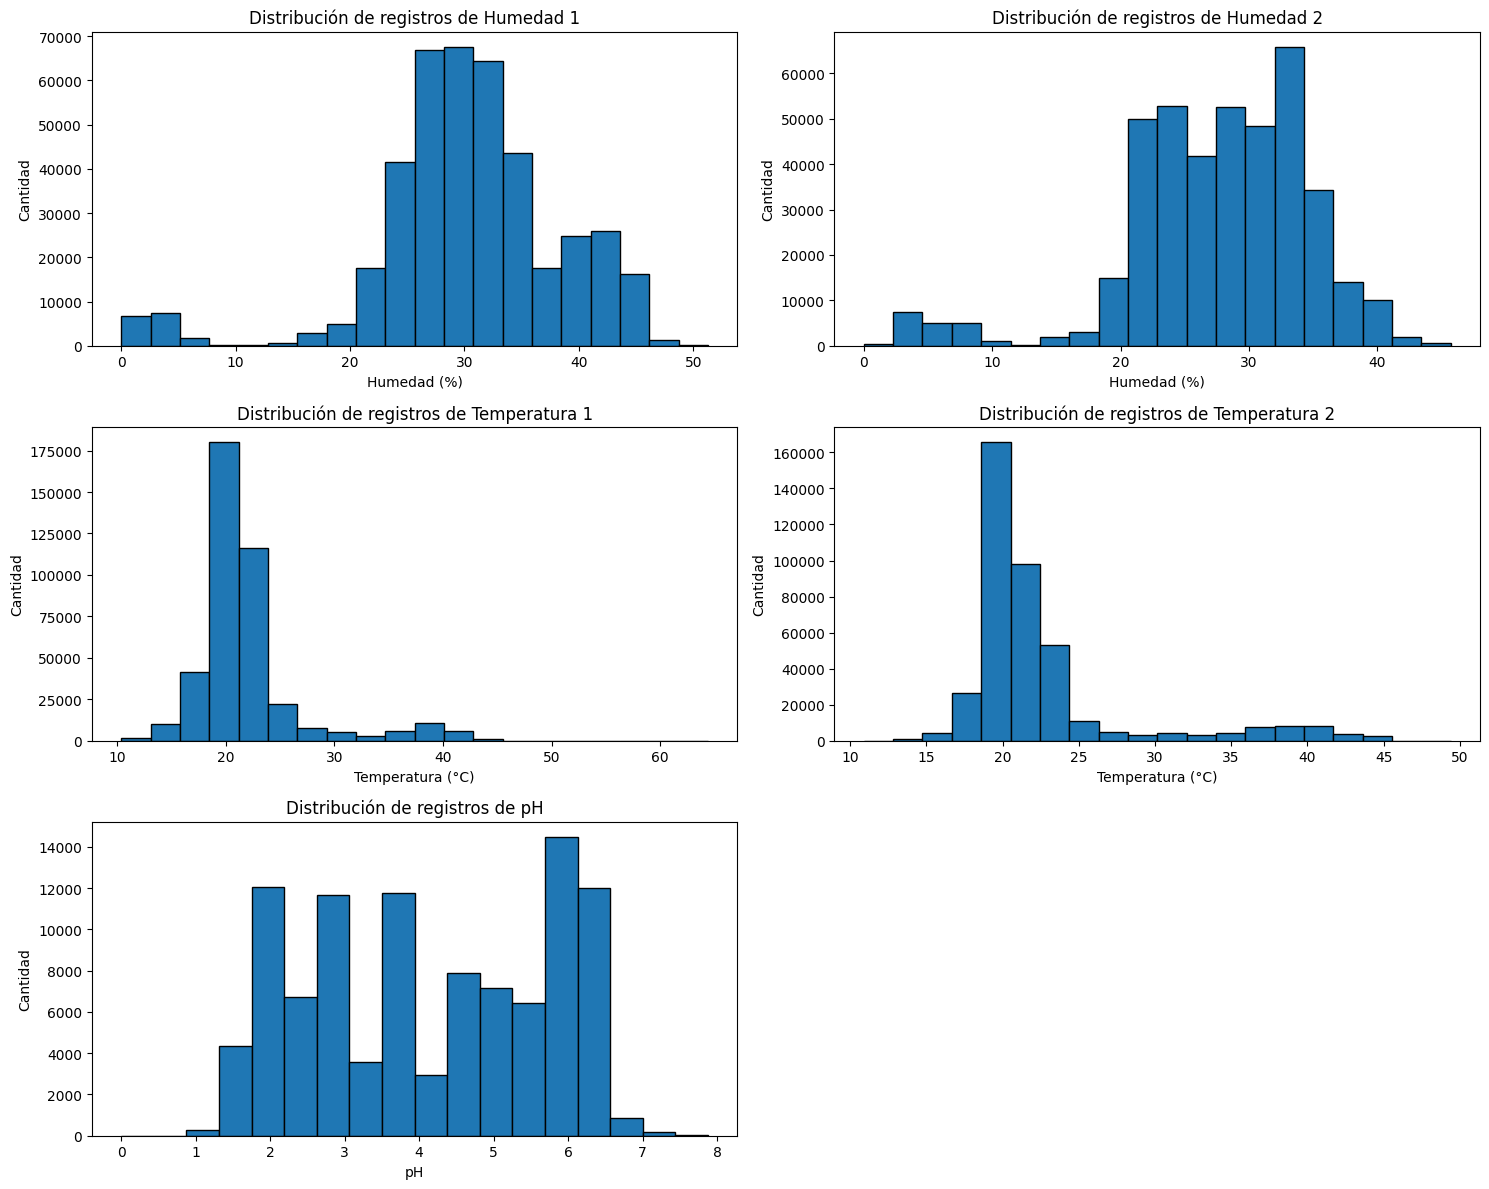

In [46]:
fig, axes = plt.subplots(nrows=3, 
                         ncols=2, 
                         figsize=(15, 12))

titles = ["Distribución de registros de Humedad 1", 
          "Distribución de registros de Humedad 2", 
          "Distribución de registros de Temperatura 1", 
          "Distribución de registros de Temperatura 2", 
          "Distribución de registros de pH"]
x_labels = ["Humedad (%)", "Humedad (%)", 
            "Temperatura (°C)", "Temperatura (°C)", "pH"]
bins = [h1_bins, h2_bins, t1_bins, t2_bins, ph_bins]

for i, (column_name, 
        title, 
        x_label, 
        bin_count) in enumerate(zip(columns, 
                                    titles, 
                                    x_labels, 
                                    bins)):
    row, col = divmod(i, 2)
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel(x_label)
    axes[row, col].set_ylabel("Cantidad")
    axes[row, col].hist(df_pivot[column_name], 
                        bins=bin_count, 
                        edgecolor="black")

axes[2, 1].axis("off")

plt.tight_layout()
plt.show()


#### Gráficos de dispersión e histogramas

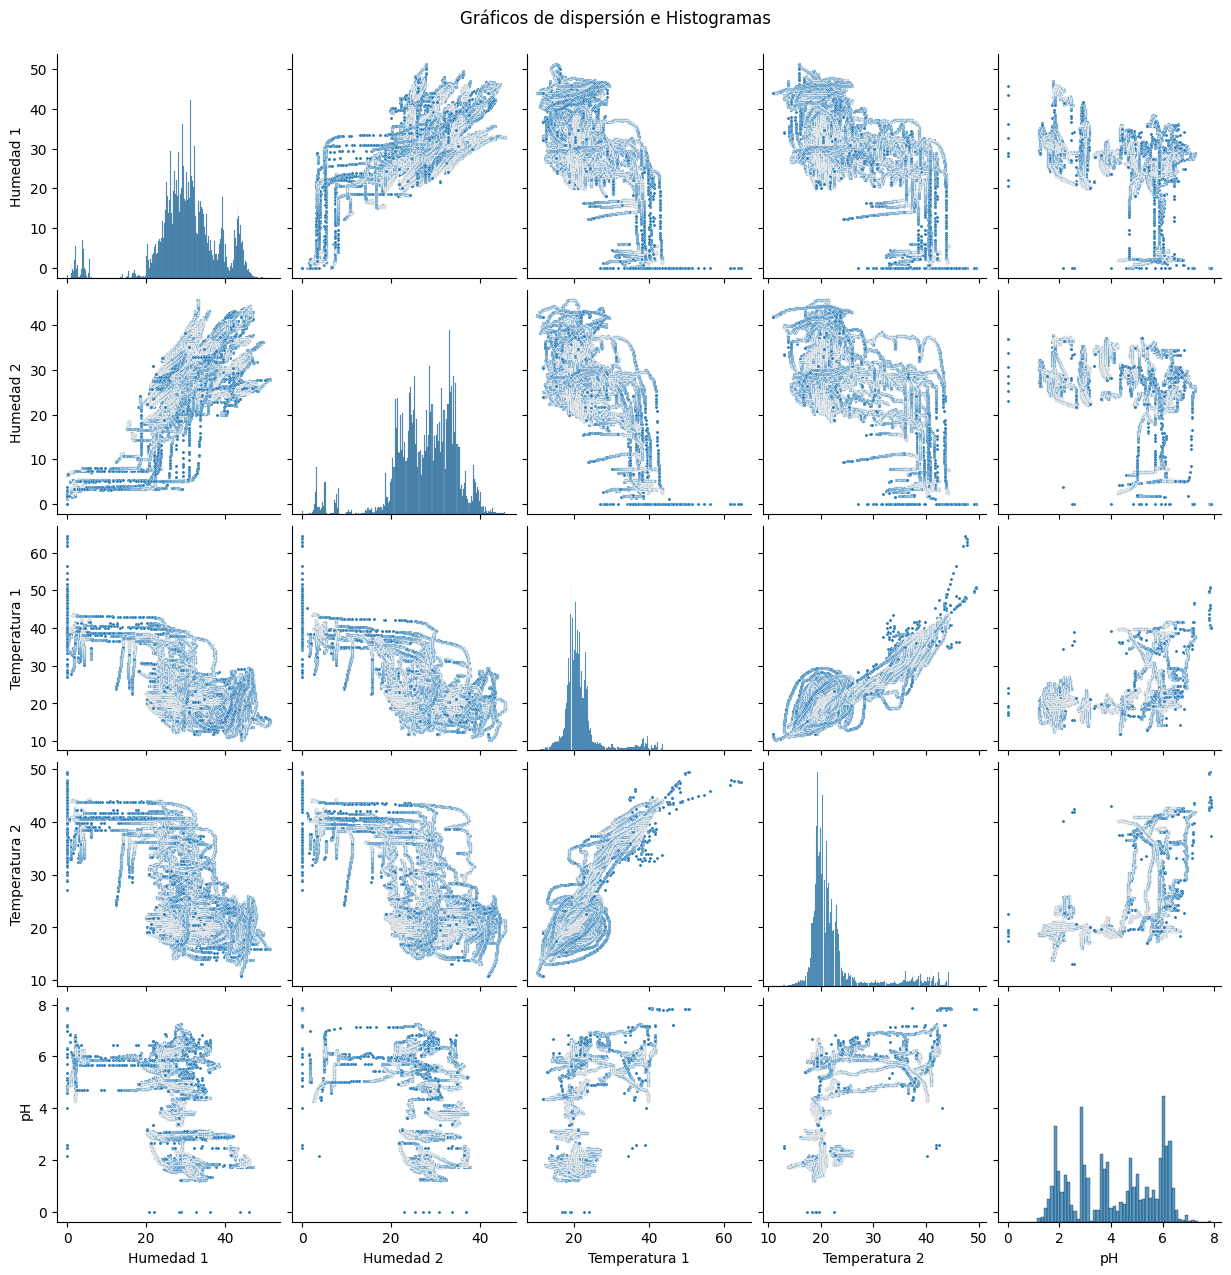

In [20]:
df_for_corrplots = df_pivot.reset_index(drop=True)
sns.pairplot(df_for_corrplots, plot_kws={"s": 5})
plt.suptitle(f"Gráficos de dispersión e Histogramas", y=1.02)

plt.tight_layout
plt.show()

##### Observaciones
**Histogramas**
* Humedad 1 y 2: Se muestran distribuciones con múltiples picos, lo que sugiere la presencia de subgrupos o diferentes comportamientos en los datos. Esto puede deberse a variaciones en las condiciones de medición o a diferencias en la ubicación o profundidad de las mediciones.
* Temperatura 1 y 2: Las distribuciones son más estrechas, especialmente para Temperatura 1, que tiene un pico pronunciado. Esto podría indicar que las mediciones de temperatura a diferentes profundidades son relativamente consistentes dentro de ciertos rangos.
* pH: Se muestra una distribución más dispersa, con varios picos, lo que sugiere variabilidad significativa en las mediciones de pH.

**Gráficos de dispersión**
* Relación entre Humedad 1 y Humedad 2: Existe una correlación positiva notable entre las mediciones de humedad a diferentes profundidades, lo que sugiere que los patrones de humedad se propagan entre las capas del suelo.
* Relación entre Temperatura 1 y Temperatura 2: Se observa una fuerte correlación positiva entre las temperaturas medidas a 1 metro y 1.5 metros de profundidad, indicando que la temperatura sigue un patrón coherente entre las dos profundidades.
* Relación entre Temperatura y Humedad: Los gráficos de dispersión entre las temperaturas y las humedades muestran una relación no lineal. Específicamente, parece haber una curva, lo que indica que a medida que la temperatura aumenta, la humedad disminuye hasta cierto punto antes de estabilizarse o aumentar ligeramente.
* Relación entre pH y otras variables: La relación entre pH y las otras variables (temperatura y humedad) es menos clara, con dispersión significativa. Esto sugiere que el pH podría estar influenciado por factores adicionales que no se capturan en estas mediciones.

### Gráficos de cajas
En los gráficos de dispersión anteriores se pueden observar algunos valores atípicos, por lo que se procede a generar un gráfico de cajas para identificarlos y hacerlos más visibles.

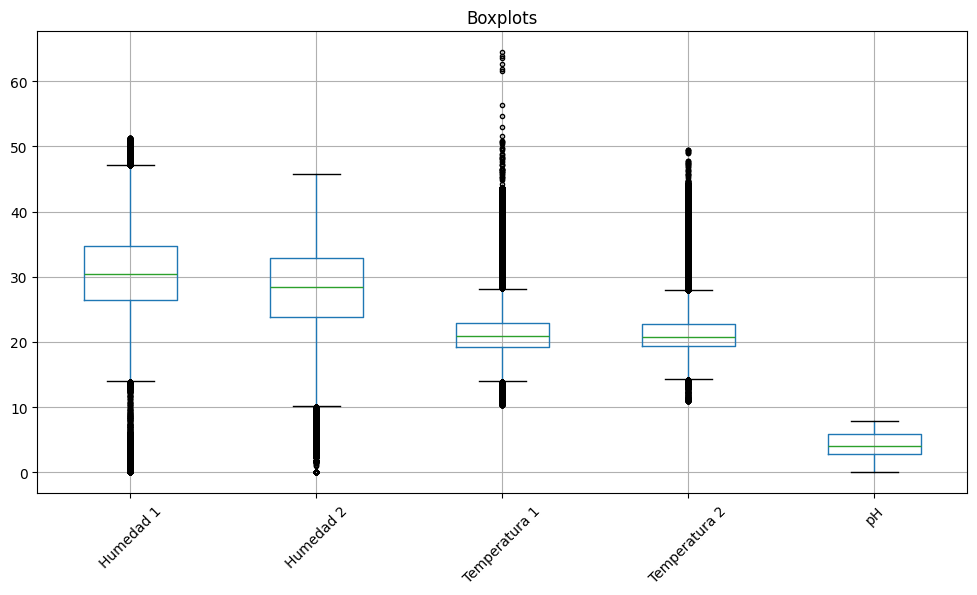

In [21]:
plt.figure(figsize=(12, 6))
df_pivot.boxplot(flierprops=dict(markersize=3))
plt.title("Boxplots")

plt.xticks(rotation=45)
plt.tight_layout
plt.show()

#### Observaciones
* Humedad 1 y 2:
    * Ambas variables de humedad tienen distribuciones bastantes similares con medianas alrededor de 30-35.
    * Los bigotes de los boxplots indican un rango intercuartil (IQR) amplio, pero hay una considerable cantidad de outliers tanto por debajo como por encima del rango IQR.
    * La presencia de muchos outliers indica variabilidad en las mediciones de humedad, lo que podría deberse a diferentes condiciones ambientales, errores de medición o variabilidad en la permeabilidad del material a diferentes profundidades.
* Temperatura 1 y 2:
    * Las variables de temperatura muestran un rango más estrecho en comparación las de humedad, pero también poseen una gran cantidad de outliers, especialmente hacia valores superiores. La concentración de outliers superiores sugiere que existen eventos ocasionales con temperaturas segnificativamente altas.
    * La mediana para ambas variables está alrededor de 20°C. 
    * El rango de temperaturas es consistente entre las dos profundidades, lo que podría indicar que la temperatura no varía mucho con la profundidad, pero hay variabilidad en los valores más altos.
* pH:
    * El pH muestra un rango mucho más estrecho, con una mediana cercana a 2.5. Sin embargo, su IQR es pequeño, lo que indica que la mayoría de las mediciones están concentradas en un rango estrecho.
    * Hay algunos outliers en ambos extremos, lo que podría ser indicativo de mediciones atípicas o errores, especialmente dado el rango tan estrecho del IQR.

### Matriz de correlación

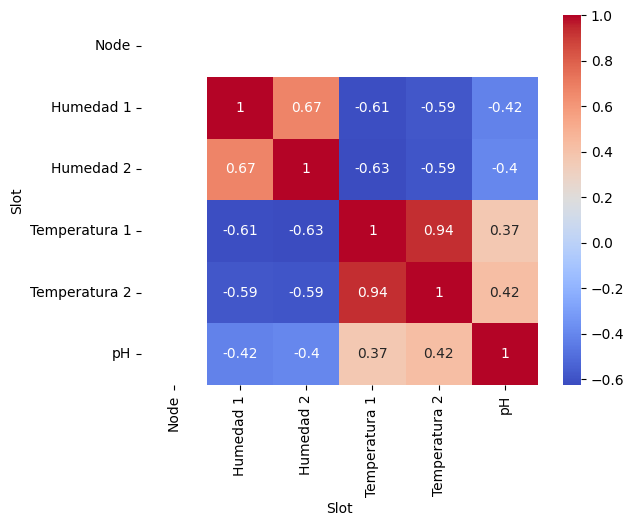

In [22]:
df_pivot_corr = df_pivot.apply(pd.to_numeric, errors="coerce")
correlation_matrix = df_pivot_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm");

#### Observaciones
* "Humedad 1" y "Humedad 2":
    * La correlación es de 0.67, lo que indica una correlación positiva moderada entre las dos variables de humedad. Aunque no es una correlación perfecta, es lo suficientemente fuerte como para sugerir que las dos variables están relacionadas.

* "Temperatura 1" y "Temperatura 2":
    * La correlación es de 0.94, lo que indica una correlación positiva muy fuerte entre ambas variables de temperatura. Esto sugiere que miden casi el mismo fenómeno, por lo que podrían estar representando información redundante.

* Variables de "Humedad" y las de "Temperatura":
    * Las correlaciones entre las variables de humedad y temperatura están en el rango de -0.59 a -0.63, lo que indica una correlación negativa moderada a fuerte. Esto implica que, a medida que las temperaturas suben, los valores de humedad tienden a disminuir, lo que podría tener sentido dependiendo del contexto físico de los datos.

* "pH" y variables de "Humedad":
    * Aunque no son correlaciones negativas fuertes, sí son lo suficientemente significativas para indicar que a medida que aumenta la humedad, el pH tiende a disminuir. Esto tiene sentido si consideramos que las condiciones de mayor humedad pueden alterar las reacciones químicas en el entorno que se están midiendo.

* "pH" y variables de "Temperatura":
    * Estas correlaciones positivas sugieren que a medida que la temperatura aumenta, el pH también tiende a aumentar. Aunque la relación no es muy fuerte, puede ser indicativa de que las condiciones más cálidas afectan el equilibrio químico.

### Colinealidad
* Hay una clara colinealidad entre las dos variables de temperatura ("Temperatura 1" y "Temperatura 2"), lo que justifica el uso de técnicas como PCA para reducir la dimensionalidad y combinar estas variables en una sola.

* Las variables de humedad también muestran correlación, pero con un valor moderado, lo que también sugiere que podrían ser combinadas.

# Data Preparation

## Outliers

### Crear variables categóricas para marcar los outliers como eventos atípicos y los datos nulos como "No aplica"

In [23]:
def identificar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[column].apply(
        lambda x: "Nulo" if pd.isnull(x) else (
            "Atípico" if x < lower_bound or x > upper_bound else "Normal"
        )
    )

In [24]:
# Tabla pivote con columnas de status
df_pivot_status = df_pivot.copy()

status_columns = ["H1 status", "H2 status", "T1 status", 
                  "T2 status", "pH status"]

df_pivot_status["H1 status"] = identificar_outliers(
    df_pivot_status, "Humedad 1")
df_pivot_status["H2 status"] = identificar_outliers(
    df_pivot_status, "Humedad 2")
df_pivot_status["T1 status"] = identificar_outliers(
    df_pivot_status, "Temperatura 1")
df_pivot_status["T2 status"] = identificar_outliers(
    df_pivot_status, "Temperatura 2")
df_pivot_status["pH status"] = identificar_outliers(
    df_pivot_status, "pH")

df_pivot_status["Any outlier"] = df_pivot_status[status_columns].apply(
                                    lambda x: 
                                    "Atípico" if "Atípico" in x.values 
                                    else "Normal", 
                                    axis=1)

df_pivot_status["Any null"] = df_pivot_status[status_columns].apply(
                        lambda x: 
                        "Nulo" if "Nulo" in x.values 
                        else "No Nulo", 
                        axis=1)

In [25]:
df_pivot_status.head()

Slot,Node,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH,H1 status,H2 status,T1 status,T2 status,pH status,Any outlier,Any null
Epoch,,,,,,,,,,,,,
2023-10-24 19:58:57,A1,0.0,0.0,50.7,49.3,7.84,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 19:59:56,A1,0.0,0.0,50.8,49.4,7.84,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 20:00:56,A1,0.0,0.0,50.8,49.4,7.83,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 20:01:56,A1,0.0,0.0,50.6,49.4,7.83,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 20:02:27,A1,0.0,0.0,50.5,49.4,7.83,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo


In [26]:
outlier_counts = {}

for column in status_columns:
    outlier_counts[column] = (
        df_pivot_status[column].value_counts().get("Atípico", 0)
    )

print("Outliers:")
outlier_counts

Outliers:


{'H1 status': np.int64(16844),
 'H2 status': np.int64(17902),
 'T1 status': np.int64(36937),
 'T2 status': np.int64(46716),
 'pH status': 0}

In [27]:
null_counts = {}

for column in status_columns:
    null_counts[column] = (
        df_pivot_status[column].value_counts().get("Nulo", 0)
    )

print("Nulos:")
null_counts

Nulos:


{'H1 status': np.int64(251),
 'H2 status': np.int64(1636),
 'T1 status': np.int64(1238),
 'T2 status': np.int64(2294),
 'pH status': np.int64(310160)}

## Descargas de datasets
Para uso en otros archivos

In [ ]:
df_pivot.to_csv("../dataset/processed/all_nodes_2.csv")

# Modeling

## Árbol de decisiones

El uso de **árbol de decisiones** en esta primera iteración de desarrollo se justifica por su simplicidad y capacidad interpretativa. 

Los árboles de decisiones permiten capturar relaciones no lineales y manejar tanto variables categóricas como numéricas sin necesidad de normalización o escalado de datos, lo que simplifica el preprocesamiento. Además, su estructura de ramificación facilita la interpretación de cómo las características influyen en las predicciones, permitiendo identificar rápidamente las variables más importantes y las interacciones clave en el dataset. 

Esta transparencia y facilidad de uso hacen del árbol de decisiones una elección ideal para explorar y comprender la dinámica del problema antes de avanzar hacia modelos más complejos.

**Variables objetivo: Humedad 1 y Humedad 2**

* Estrategia de modelado:
    * Modelos separados: Construir modelos separados para cada variable objetivo. Ajustar un árbol de decisión para Humedad 1 y otro para Humedad 2, para una mayor flexibilidad y una interpretación más clara de cada modelo.
    * Análisis comparativo: Realizar un análisis comparativo para entender cómo cada modelo se desempeña con respecto a las variables objetivo.

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

### Preparación de variables para entrenamiento con columnas dummies

In [30]:
df_pivot_status.head()

Slot,Node,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH,H1 status,H2 status,T1 status,T2 status,pH status,Any outlier,Any null
Epoch,,,,,,,,,,,,,
2023-10-24 19:58:57,A1,0.0,0.0,50.7,49.3,7.84,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 19:59:56,A1,0.0,0.0,50.8,49.4,7.84,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 20:00:56,A1,0.0,0.0,50.8,49.4,7.83,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 20:01:56,A1,0.0,0.0,50.6,49.4,7.83,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo
2023-10-24 20:02:27,A1,0.0,0.0,50.5,49.4,7.83,Atípico,Atípico,Atípico,Atípico,Normal,Atípico,No Nulo


In [31]:
df_pivot_reset = df_pivot_status.reset_index()

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(
    df_pivot_reset[["Node", "H1 status", "H2 status", "T1 status", 
                    "T2 status", "pH status", "Any outlier", "Any null"]])
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(
        ["Node", "H1 status", "H2 status", "T1 status", 
         "T2 status", "pH status", "Any outlier", "Any null"]))

In [32]:
combined_df = pd.concat([df_pivot_reset, encoded_df], axis=1)
combined_df = combined_df.drop(
    columns=["Epoch", "Node", "H1 status", "H2 status", "T1 status", 
             "T2 status", "pH status", "Any outlier", "Any null"])

In [33]:
combined_df.head()

,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH,Node_A1,Node_A2,Node_A3,Node_A4,Node_B1,...,T1 status_Nulo,T2 status_Atípico,T2 status_Normal,T2 status_Nulo,pH status_Normal,pH status_Nulo,Any outlier_Atípico,Any outlier_Normal,Any null_No Nulo,Any null_Nulo
0,0.0,0.0,50.7,49.3,7.84,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,50.8,49.4,7.84,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,50.8,49.4,7.83,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,50.6,49.4,7.83,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,50.5,49.4,7.83,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412513 entries, 0 to 412512
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Humedad 1            412262 non-null  float64
 1   Humedad 2            410877 non-null  float64
 2   Temperatura 1        411275 non-null  float64
 3   Temperatura 2        410219 non-null  float64
 4   pH                   102353 non-null  float64
 5   Node_A1              412513 non-null  float64
 6   Node_A2              412513 non-null  float64
 7   Node_A3              412513 non-null  float64
 8   Node_A4              412513 non-null  float64
 9   Node_B1              412513 non-null  float64
 10  Node_B2              412513 non-null  float64
 11  Node_B3              412513 non-null  float64
 12  Node_B4              412513 non-null  float64
 13  Node_C1              412513 non-null  float64
 14  Node_C2              412513 non-null  float64
 15  Node_C3          

##### Target: Humedad 1 con columnas dummy

**h1_cd**: 
* Variable target: Humedad 1
* Con dummies

In [35]:
target_humidity1 = combined_df.copy()

target_humidity1_clean = (
    target_humidity1.dropna(subset=["Humedad 1"])
)

x_var_h1_cd = (
    target_humidity1_clean
    .columns[target_humidity1_clean.columns != "Humedad 1"]
    .to_numpy()
)
y_vay_h1_cd = "Humedad 1"
X_h1_cd = target_humidity1_clean[x_var_h1_cd]
y_h1_cd = target_humidity1_clean[y_vay_h1_cd]

X_train_h1_cd, X_test_h1_cd, y_train_h1_cd, y_test_h1_cd = (
    train_test_split(X_h1_cd, y_h1_cd, test_size=0.3, random_state=42)
)

**Entrenamiento**

In [36]:
reg_tree_h1_cd = DecisionTreeRegressor()
reg_tree_h1_cd.fit(X_train_h1_cd, y_train_h1_cd)

DecisionTreeRegressor()

**Importancia de las características**

In [37]:
feature_names = X_train_h1_cd.columns
importances = reg_tree_h1_cd.feature_importances_
feature_importance_df = (
    pd.DataFrame({"Variable": feature_names, 
                  "Importancia": importances})
                  .sort_values(by="Importancia", 
                               ascending=False)
                  .reset_index(drop=True)
)
feature_importance_df["Importancia"] = (
    feature_importance_df["Importancia"].round(6)
)
feature_importance_df.head(10)

,Variable,Importancia
0,Humedad 2,0.655405
1,Node_A2,0.091852
2,Node_A3,0.078906
3,Node_C2,0.049623
4,H1 status_Normal,0.025917
5,pH,0.025138
6,Temperatura 2,0.010166
7,Node_B4,0.009986
8,Node_D2,0.009143
9,Node_C4,0.008007


Debido a la alta colinealidad entre Humedad 1 y Humedad 2, ésta última tiene un grado de importancia mayor, por sobre las otras variables, en la predicción de la primera. Por lo tanto, se puede optar por eliminar la columna de Humedad 2 y las asociadas a ésta para el entrenamiento del modelo cuyo target es Humedad 1

##### Target: Humedad 1 sin columnas dummy

**h1_sd**: 
* Variable target: Humedad 1
* Sin dummies

In [38]:
df_pivot.head()

Slot,Node,Humedad 1,Humedad 2,Temperatura 1,Temperatura 2,pH
Epoch,,,,,,
2023-10-24 19:58:57,A1,0.0,0.0,50.7,49.3,7.84
2023-10-24 19:59:56,A1,0.0,0.0,50.8,49.4,7.84
2023-10-24 20:00:56,A1,0.0,0.0,50.8,49.4,7.83
2023-10-24 20:01:56,A1,0.0,0.0,50.6,49.4,7.83
2023-10-24 20:02:27,A1,0.0,0.0,50.5,49.4,7.83


In [39]:
target_humidity1 = df_pivot.copy()

target_humidity1 = target_humidity1.drop(columns="Node")

target_humidity1_clean = (
    target_humidity1.dropna(subset=["Humedad 1"])
)

x_var_h1_sd = (
    target_humidity1_clean
    .columns[target_humidity1_clean.columns != "Humedad 1"]
    .to_numpy()
)
y_vay_h1_sd = "Humedad 1"
X_h1_sd = target_humidity1_clean[x_var_h1_sd]
y_h1_sd = target_humidity1_clean[y_vay_h1_sd]

X_train_h1_sd, X_test_h1_sd, y_train_h1_sd, y_test_h1_sd = (
    train_test_split(X_h1_sd, y_h1_sd, test_size=0.3, random_state=42)
)

**Entrenamiento**

In [40]:
reg_tree_h1_sd = DecisionTreeRegressor()
reg_tree_h1_sd.fit(X_train_h1_sd, y_train_h1_sd)

DecisionTreeRegressor()

**Importancia de las características**

In [41]:
feature_names = X_train_h1_sd.columns
importances = reg_tree_h1_sd.feature_importances_
feature_importance_df = (
    pd.DataFrame({"Variable": feature_names, 
                  "Importancia": importances})
                  .sort_values(by="Importancia", 
                               ascending=False)
                  .reset_index(drop=True)
)
feature_importance_df["Importancia"] = (
    feature_importance_df["Importancia"].round(6)
)
feature_importance_df.head(10)

,Variable,Importancia
0,Humedad 2,0.696119
1,Temperatura 1,0.104245
2,pH,0.100738
3,Temperatura 2,0.098897


# Evaluation

## Árbol de decisiones (regresión)

**MSE (Mean Squared Error):**
* Qué mide: El promedio de los errores al cuadrado entre las predicciones y los valores reales.
* Interpretación: Cuanto menor sea el MSE, mejor es el rendimiento del modelo. Penaliza más los errores grandes debido al cuadrado.

**MAE (Mean Absolute Error):**
* Qué mide: El promedio de los errores absolutos entre las predicciones y los valores reales.
* Interpretación: También mide el error, pero no penaliza tanto los errores grandes como el MSE. Es más fácil de interpretar porque está en las mismas unidades que las variables.

**R² (Coeficiente de Determinación):**
* Qué mide: La proporción de la variación total en los datos que el modelo puede explicar.
* Interpretación: Un valor de R² cercano a 1 indica que el modelo explica bien la variabilidad de los datos; valores bajos indican lo contrario.

In [42]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAE Train": mae_train,
        "MAE Test": mae_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test
    }

### Target: Humedad 1

#### Con dummies

In [43]:
evaluate_model(reg_tree_h1_cd, 
               X_train_h1_cd, X_test_h1_cd, 
               y_train_h1_cd, y_test_h1_cd)

{'MSE Train': np.float64(0.034144985591539626),
 'MSE Test': np.float64(0.1001671006456133),
 'MAE Train': np.float64(0.05771395625509756),
 'MAE Test': np.float64(0.08063807259901727),
 'R2 Train': 0.9994999502134101,
 'R2 Test': 0.9985392926891898}

**Observaciones (modificar a medida que se vayan obteniendo nuevos resultados)**

* **MSE**:
    * El valor promedio en los datos de entrenamiento es extremadamente bajo (0.0346), lo que indica un ajuste muy preciso.
    * En los datos de prueba, aunque el MSE aumenta (0.1118), sigue siendo bastante bajo en términos absolutos, lo que sugiere un buen rendimiento general del modelo.

* **MAE**:
    * El error absoluto en los datos de entrenamiento es muy bajo (0.0578), lo que significa que el modelo tiene un ajuste preciso en este conjunto.
    * En los datos de prueba, el MAE también es bajo (0.0809), aunque es mayor que en los datos de entrenamiento, lo que podría indicar un leve sobreajuste.

* **R²**:
    * El modelo explica el 99.95% de la variabilidad en los datos de entrenamiento (R² = 0.9995), lo cual es un ajuste excelente.
    * En los datos de prueba, el modelo aún explica el 99.84% de la variabilidad (R² = 0.9984), lo que muestra un muy buen ajuste también en este conjunto.

* **Interpretación general**:
    * El modelo presenta un leve sobreajuste, ya que las métricas de error en los datos de prueba son un poco más altas que en los de entrenamiento, aunque siguen siendo muy bajas.
    * En cuanto a la capacidad de explicación de la variabilidad, el modelo tiene un ajuste excelente tanto en los datos de entrenamiento como en los de prueba.

* **Próximos pasos**:
    * Considerar ajustar los hiperparámetros para minimizar aún más el sobreajuste y mejorar la generalización del modelo en los datos de prueba.
    * Posiblemente reducir la profundidad del árbol o aplicar técnicas de regularización.

#### Sin dummies

In [44]:
evaluate_model(reg_tree_h1_sd, 
               X_train_h1_sd, X_test_h1_sd, 
               y_train_h1_sd, y_test_h1_sd)

{'MSE Train': np.float64(0.35449869363928954),
 'MSE Test': np.float64(0.8147878132343895),
 'MAE Train': np.float64(0.11922616978579555),
 'MAE Test': np.float64(0.1712883569624192),
 'R2 Train': 0.994808403253664,
 'R2 Test': 0.9881181894266737}

**Observaciones (modificar a medida que se vayan obteniendo nuevos resultados)** 
* MSE:
    * El valor promedio en los datos de entrenamiento es bastante bajo, pero en los datos de prueba es más alto.
    * *El modelo puede estar ajustado a los datos de entrenamiento (sobreajuste), ya que su desempeño es peor en los datos de prueba.*
* MAE:
    * En los datos de entrenamiento es bajo, pero en los de prueba es mayor, lo que refuerza la posibilidad de que el modelo esté ligeramente sobreajustado.
* R²:
    * El modelo explica el 99.5% de la variabilidad en los datos de entrenamiento y 98.8% en los de prueba, lo que undica un buen ajuste.

* **Interpretación general:**
    * Sobreajuste leve: La diferencia entre las métricas de entrenamiento y prueba sugiere que el modelo podría estar sobreajustado ligeramente a los datos de entrenamiento.
    * Buen ajuste en cuanto a variabilidad.

* Próximos pasos:
    * Reducir el sobreajuste y ajustar los hiperparámetros (como la profundidad máxima del árbol), para mejorar la generalización del modelo en los datos de prueba.